In [512]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # prevents future version warnings

In [513]:
df = pd.read_csv('./ds.csv')
df.info()
df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17990 entries, 0 to 17989
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17990 non-null  int64  
 1   age_of_driver            17990 non-null  int64  
 2   gender                   17990 non-null  object 
 3   marital_status           17985 non-null  float64
 4   safty_rating             17990 non-null  int64  
 5   annual_income            17990 non-null  int64  
 6   high_education_ind       17990 non-null  int64  
 7   address_change_ind       17990 non-null  int64  
 8   living_status            17990 non-null  object 
 9   zip_code                 17990 non-null  int64  
 10  claim_date               17990 non-null  object 
 11  claim_day_of_week        17990 non-null  object 
 12  accident_site            17990 non-null  object 
 13  past_num_of_claims       17990 non-null  int64  
 14  witness_present_ind   

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,12/16/2016,Friday,Local,1,0.0,74,Broker,0,7530.940993,9,Compact,12885.452350,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,02/12/2015,Thursday,Highway,1,1.0,79,Online,0,2966.024895,4,Large,29429.452180,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,12/06/2016,Tuesday,Local,0,0.0,0,Broker,0,6283.888333,3,Compact,21701.181950,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,05/05/2016,Thursday,Local,3,0.0,99,Broker,1,6169.747994,4,Medium,13198.273440,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,10/27/2015,Tuesday,Highway,0,1.0,7,Broker,0,4541.387150,7,Medium,38060.211220,gray,25876.56319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17985,29993,69,M,1.0,93,42338,1,0,Own,15012,3/28/2015,Saturday,Local,0,0.0,99,Broker,0,4806.841803,6,Medium,32144.571850,black,16868.53410,0
17986,29996,35,F,0.0,22,35579,1,1,Own,20111,01/05/2015,Monday,Local,1,0.0,94,Phone,1,4089.794471,3,Medium,9468.510601,blue,31500.99689,1
17987,29997,27,F,1.0,81,32953,0,1,Rent,15012,09/10/2016,Saturday,Local,2,0.0,1,Online,1,2225.803056,5,Medium,64974.369590,black,44536.25506,0
17988,29999,52,F,1.0,86,39519,1,0,Own,15026,12/25/2015,Friday,Highway,1,1.0,75,Broker,1,9560.744844,3,Compact,24983.268110,white,50093.75959,0


In [514]:
#Write about the columns we deleted and why

In [515]:
# deletes useless columns

df.pop("claim_number")
df.pop("claim_date")
df.pop("liab_prct")
df.pop("witness_present_ind")
df.pop("channel")
df.pop("policy_report_filed_ind")
df.pop("claim_est_payout")
df.pop("claim_day_of_week")
df.pop("accident_site")


df.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,past_num_of_claims,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,46,M,1.0,85,38301,1,1,Rent,80006,1,9,Compact,12885.45235,white,16161.33381,0
1,21,F,0.0,75,30445,0,1,Rent,15021,1,4,Large,29429.45218,white,28691.96422,0
2,49,F,0.0,87,38923,0,1,Own,20158,0,3,Compact,21701.18195,white,22090.94758,1
3,58,F,1.0,58,40605,1,0,Own,15024,3,4,Medium,13198.27344,other,38329.58106,1
4,38,M,1.0,95,36380,1,0,Rent,50034,0,7,Medium,38060.21122,gray,25876.56319,0


In [516]:
# binarise catagorical columns

df = pd.get_dummies(df, columns=['gender'])
df = pd.get_dummies(df, columns=['living_status'])
df = pd.get_dummies(df, columns=['vehicle_category'])
df = pd.get_dummies(df, columns=['vehicle_color'])

df.head()

,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,age_of_vehicle,vehicle_price,vehicle_weight,fraud,gender_F,gender_M,living_status_Own,living_status_Rent,vehicle_category_Compact,vehicle_category_Large,vehicle_category_Medium,vehicle_color_black,vehicle_color_blue,vehicle_color_gray,vehicle_color_other,vehicle_color_red,vehicle_color_silver,vehicle_color_white
0,46,1.0,85,38301,1,1,80006,1,9,12885.45235,16161.33381,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1
1,21,0.0,75,30445,0,1,15021,1,4,29429.45218,28691.96422,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
2,49,0.0,87,38923,0,1,20158,0,3,21701.18195,22090.94758,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1
3,58,1.0,58,40605,1,0,15024,3,4,13198.27344,38329.58106,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0
4,38,1.0,95,36380,1,0,50034,0,7,38060.21122,25876.56319,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0


In [517]:
# fix data type of marital status from float to int

df['martial_status_clean'] = df['marital_status'] == 1.0
df['martial_status_clean'] = df['martial_status_clean'].astype(int)

df.pop('marital_status')
df.head()

,age_of_driver,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,age_of_vehicle,vehicle_price,vehicle_weight,fraud,gender_F,gender_M,living_status_Own,living_status_Rent,vehicle_category_Compact,vehicle_category_Large,vehicle_category_Medium,vehicle_color_black,vehicle_color_blue,vehicle_color_gray,vehicle_color_other,vehicle_color_red,vehicle_color_silver,vehicle_color_white,martial_status_clean
0,46,85,38301,1,1,80006,1,9,12885.45235,16161.33381,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1
1,21,75,30445,0,1,15021,1,4,29429.45218,28691.96422,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,49,87,38923,0,1,20158,0,3,21701.18195,22090.94758,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
3,58,58,40605,1,0,15024,3,4,13198.27344,38329.58106,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,38,95,36380,1,0,50034,0,7,38060.21122,25876.56319,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1


<AxesSubplot:>

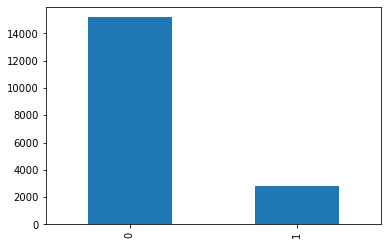

In [518]:

df['fraud'].value_counts(normalize=True)

df['fraud'].value_counts().plot(kind='bar')




In [519]:
from sklearn.model_selection import train_test_split
df_train1, df_splitter = train_test_split(df, test_size=0.2, stratify=df['fraud'], random_state=888)
features = df_train1.drop(columns=['fraud']).columns

df_test1, df_valid1 = train_test_split(df_splitter, test_size=0.5, stratify=df_splitter['fraud'], random_state=888)
features = df_valid1.drop(columns=['fraud']).columns

df_train1['fraud'].value_counts()


0    12141
1     2251
Name: fraud, dtype: int64

In [520]:

# copy the data
df_train = df_train1.copy()
  
# apply normalization techniques
for column in df_train.columns:
    df_train[column] = df_train[column]  / df_train[column].abs().max()
      
# view normalized data
display(df_train)

,age_of_driver,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,age_of_vehicle,vehicle_price,vehicle_weight,fraud,gender_F,gender_M,living_status_Own,living_status_Rent,vehicle_category_Compact,vehicle_category_Large,vehicle_category_Medium,vehicle_color_black,vehicle_color_blue,vehicle_color_gray,vehicle_color_other,vehicle_color_red,vehicle_color_silver,vehicle_color_white,martial_status_clean
6981,0.235808,0.76,0.734103,1.0,0.0,0.588061,0.166667,0.3750,0.137367,0.466662,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5490,0.192140,0.90,0.696409,1.0,1.0,0.999389,0.000000,0.4375,0.281038,0.226175,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5786,0.152838,0.66,0.654538,0.0,1.0,0.999941,0.000000,0.2500,0.144028,0.102733,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14493,0.152838,0.63,0.654556,0.0,1.0,0.236322,0.000000,0.2500,0.444316,0.220944,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8960,0.323144,0.74,0.792318,0.0,0.0,0.999589,0.000000,0.1875,0.161476,0.105582,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15105,0.144105,0.76,0.643568,0.0,1.0,0.236498,0.000000,0.4375,0.154993,0.336014,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2180,0.187773,0.48,0.692305,1.0,0.0,0.999248,0.000000,0.2500,0.209676,0.092240,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7684,0.174672,0.68,0.678998,1.0,1.0,0.940775,0.000000,0.3125,0.292007,0.204636,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2898,0.157205,0.84,0.659305,0.0,1.0,0.999730,0.000000,0.3750,0.191968,0.266381,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [521]:

# copy the data
df_test = df_test1.copy()
  
# apply normalization techniques
for column in df_train.columns:
    df_test[column] = df_test[column]  / df_test[column].abs().max()
      
# view normalized data
display(df_test)

,age_of_driver,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,age_of_vehicle,vehicle_price,vehicle_weight,fraud,gender_F,gender_M,living_status_Own,living_status_Rent,vehicle_category_Compact,vehicle_category_Large,vehicle_category_Medium,vehicle_color_black,vehicle_color_blue,vehicle_color_gray,vehicle_color_other,vehicle_color_red,vehicle_color_silver,vehicle_color_white,martial_status_clean
11511,0.413534,0.636364,0.819180,0.0,1.0,0.236369,0.500000,0.461538,0.104257,0.190480,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15836,0.195489,0.656566,0.666537,1.0,0.0,0.999107,0.333333,0.384615,0.076981,0.366293,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
417,0.330827,0.717172,0.774134,1.0,1.0,0.941469,0.166667,0.461538,0.074273,0.163859,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15736,0.646617,0.424242,0.910909,1.0,1.0,0.176910,0.000000,0.153846,0.192049,0.222896,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9278,0.293233,0.959596,0.749392,1.0,1.0,0.236581,0.500000,0.230769,0.167792,0.147211,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.240602,0.959596,0.708762,1.0,1.0,0.588273,0.000000,0.615385,0.071807,0.367868,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9106,0.157895,0.494949,0.623086,1.0,0.0,0.176874,0.000000,0.615385,0.145425,0.500349,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8408,0.533835,0.797980,0.871894,1.0,0.0,0.176698,0.000000,0.538462,0.139783,0.166319,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12726,0.240602,0.626263,0.708660,1.0,1.0,0.940294,0.000000,0.692308,0.140040,0.332099,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [522]:

# copy the data
df_valid = df_valid1.copy()
  
# apply normalization techniques
for column in df_train.columns:
    df_valid[column] = df_valid[column]  / df_valid[column].abs().max()
      
# view normalized data
display(df_valid)

,age_of_driver,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,age_of_vehicle,vehicle_price,vehicle_weight,fraud,gender_F,gender_M,living_status_Own,living_status_Rent,vehicle_category_Compact,vehicle_category_Large,vehicle_category_Medium,vehicle_color_black,vehicle_color_blue,vehicle_color_gray,vehicle_color_other,vehicle_color_red,vehicle_color_silver,vehicle_color_white,martial_status_clean
13792,0.255,0.79,0.742395,1.0,0.0,0.940705,0.000000,0.266667,0.123409,0.149304,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8371,0.275,0.66,0.756549,0.0,0.0,0.587908,0.000000,0.333333,0.156417,0.062452,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14614,0.320,0.89,0.784951,1.0,1.0,0.588096,0.000000,0.600000,0.358656,0.296742,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1441,0.190,0.49,0.686665,1.0,0.0,0.999377,0.000000,0.266667,0.353821,0.294302,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6733,0.230,0.65,0.722484,1.0,0.0,0.176710,0.000000,0.266667,0.210738,0.157423,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441,0.240,0.44,0.730184,1.0,1.0,0.236851,0.500000,0.400000,0.273428,0.181947,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12970,0.245,0.63,0.734468,1.0,1.0,0.999354,0.333333,0.400000,0.177456,0.879153,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4847,0.215,0.58,0.710350,1.0,0.0,0.940740,0.166667,0.266667,0.441377,0.296064,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4100,0.275,0.73,0.756454,1.0,1.0,0.176310,0.000000,0.200000,0.057664,0.214021,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [523]:
df_test['fraud'].value_counts()

0.0    1517
1.0     282
Name: fraud, dtype: int64

In [524]:
df_valid['fraud'].value_counts()

0.0    1518
1.0     281
Name: fraud, dtype: int64

In [525]:
msk = df_train['fraud'] == 1
num_to_oversample = len(df_train) - 2*msk.sum()
df_positive_oversample = df_train[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df_train_oversample = pd.concat([df_train, df_positive_oversample])
df_train_oversample['fraud'].value_counts()

0.0    12141
1.0    12141
Name: fraud, dtype: int64

In [526]:
msk = df_test['fraud'] == 1
num_to_oversample = len(df_test) - 2*msk.sum()
df_positive_oversample = df_test[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df_test_oversample = pd.concat([df_test, df_positive_oversample])
df_test_oversample['fraud'].value_counts()

0.0    1517
1.0    1517
Name: fraud, dtype: int64

In [527]:
msk = df_valid['fraud'] == 1
num_to_oversample = len(df_valid) - 2*msk.sum()
df_positive_oversample = df_valid[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df_valid_oversample = pd.concat([df_valid, df_positive_oversample])
df_valid_oversample['fraud'].value_counts()

0.0    1518
1.0    1518
Name: fraud, dtype: int64

In [528]:
x_train = df_train_oversample.drop(columns=['fraud'])
y_train = df_train_oversample['fraud']

x_valid = df_valid_oversample.drop(columns=['fraud'])
y_valid = df_valid_oversample['fraud']

x_test = df_test_oversample.drop(columns=['fraud'])
y_test = df_test_oversample['fraud']

In [529]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

df_strain = pd.DataFrame(x_train.copy())
# print(df_strain.head())

scaler = preprocessing.StandardScaler()
df_strain = scaler.fit_transform(df_strain)
df_strain = pd.DataFrame(df_strain)
df_strain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.971866,0.195220,0.927477,0.717946,-1.238492,0.030112,0.364167,0.388750,-0.786052,2.795856,0.999424,-0.999424,0.908688,-0.908688,-0.720714,-0.701349,1.429953,-0.422368,-0.400191,-0.409973,2.510112,-0.406953,-0.414622,-0.405026,-1.454604
1,0.090427,1.075492,0.212923,0.717946,0.807434,1.231148,-0.573354,0.828764,0.422343,0.373012,0.999424,-0.999424,-1.100487,1.100487,-0.720714,1.425824,-0.699324,-0.422368,-0.400191,-0.409973,2.510112,-0.406953,-0.414622,-0.405026,0.687472
2,-0.702868,-0.433546,-0.580832,-1.392862,0.807434,1.232761,-0.573354,-0.491279,-0.730029,-0.870639,0.999424,-0.999424,0.908688,-0.908688,1.387512,-0.701349,-0.699324,2.367604,-0.400191,-0.409973,-0.398389,-0.406953,-0.414622,-0.405026,0.687472
3,-0.702868,-0.622176,-0.580483,-1.392862,0.807434,-0.996930,-0.573354,-0.491279,1.795652,0.320316,-1.000577,1.000577,-1.100487,1.100487,-0.720714,-0.701349,1.429953,2.367604,-0.400191,-0.409973,-0.398389,-0.406953,-0.414622,-0.405026,0.687472
4,2.734743,0.069467,2.031058,-1.392862,-1.238492,1.231731,-0.573354,-0.931293,-0.583278,-0.841934,-1.000577,1.000577,0.908688,-0.908688,-0.720714,-0.701349,1.429953,-0.422368,-0.400191,-0.409973,-0.398389,2.457287,-0.414622,-0.405026,0.687472


In [530]:
print(x_train.head())
pd.set_option('display.max_columns', None)

       age_of_driver  safty_rating  annual_income  high_education_ind  \
6981        0.235808          0.76       0.734103                 1.0   
5490        0.192140          0.90       0.696409                 1.0   
5786        0.152838          0.66       0.654538                 0.0   
14493       0.152838          0.63       0.654556                 0.0   
8960        0.323144          0.74       0.792318                 0.0   

       address_change_ind  zip_code  past_num_of_claims  age_of_vehicle  \
6981                  0.0  0.588061            0.166667          0.3750   
5490                  1.0  0.999389            0.000000          0.4375   
5786                  1.0  0.999941            0.000000          0.2500   
14493                 1.0  0.236322            0.000000          0.2500   
8960                  0.0  0.999589            0.000000          0.1875   

       vehicle_price  vehicle_weight  gender_F  gender_M  living_status_Own  \
6981        0.137367        0.4

In [531]:
df_stest = pd.DataFrame(x_test.copy())
# print(df_stest.head())

scaler = preprocessing.StandardScaler()
df_stest = scaler.fit_transform(df_stest)
df_stest = pd.DataFrame(df_stest)
print(df_stest.head())

         0         1         2         3         4         5         6   \
0  1.025792 -0.589357  0.987633 -1.373599  0.752555 -0.950159  2.062066   
1 -1.438989 -0.467692 -1.588851  0.728014 -1.328806  1.298834  1.188158   
2  0.090875 -0.102697  0.227286  0.728014  0.752555  1.128884  0.314250   
3  3.660558 -1.866837  2.535940  0.728014  0.752555 -1.125480 -0.559658   
4 -0.334087  1.357281 -0.190336  0.728014  0.752555 -0.949535  2.062066   

         7         8         9         10        11        12        13  \
0  0.378332 -0.811152 -0.644860 -0.979124  0.979124 -1.079628  1.079628   
1 -0.069002 -1.094621  0.513860  1.021322 -1.021322  0.926245 -0.926245   
2  0.378332 -1.122767 -0.820309 -0.979124  0.979124  0.926245 -0.926245   
3 -1.411005  0.101245 -0.431217 -0.979124  0.979124 -1.079628  1.079628   
4 -0.963671 -0.150854 -0.930030 -0.979124  0.979124  0.926245 -0.926245   

         14        15        16        17       18        19        20  \
0  1.444462 -0.685537 -0

In [532]:
df_svalid = pd.DataFrame(x_valid.copy())
# print(df_svalid.head())

scaler = preprocessing.StandardScaler()
df_svalid = scaler.fit_transform(df_svalid)
df_svalid = pd.DataFrame(df_svalid)
# print(df_svalid.head())

In [533]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=888)

clf.fit(df_train_oversample[features], df_train_oversample['fraud'])
y_pred = clf.predict_proba(df_test[features])[:, 1]


from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['fraud'], y_pred)

0.6858791848413022

<AxesSubplot:>

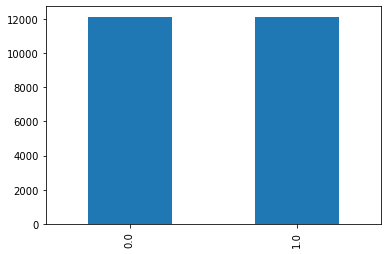

In [534]:

df_train_oversample['fraud'].value_counts(normalize=True)

df_train_oversample['fraud'].value_counts().plot(kind='bar')


In [535]:
pd.set_option('display.max_columns', None)

In [541]:
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score


class ModelSummary:
    """ This class extracts a summary of the model
    
    Methods
    -------
    get_se()
        computes standard error
    get_ci(SE_est)
        computes confidence intervals
    get_pvals()
        computes p-values
    get_summary(name=None)
        prints the summary of the model
    """
    
    def __init__(self, clf, X, y):
        """
        Parameters
        ----------
        clf: class
            the classifier object model
        X: pandas Dataframe
            matrix of predictors
        y: numpy array
            matrix of variable
        """
        self.clf = clf
        self.X = X
        self.y = y
        pass
    
    def get_se(self):
        # from here https://stats.stackexchange.com/questions/89484/how-to-compute-the-standard-errors-of-a-logistic-regressions-coefficients
        predProbs = self.clf.predict_proba(self.X)
        X_design = np.hstack([np.ones((self.X.shape[0], 1)), self.X])
        V = np.diagflat(np.product(predProbs, axis=1))
        covLogit = np.linalg.inv(np.dot(np.dot(X_design.T, V), X_design))
        return np.sqrt(np.diag(covLogit))

    def get_ci(self, SE_est):
        """
        Parameters
        ----------
        SE_est: numpy array
            matrix of standard error estimations
        """
        p = 0.975
        df = len(self.X) - 2
        crit_t_value = stats.t.ppf(p, df)
        coefs = np.concatenate([self.clf.intercept_, self.clf.coef_[0]])
        upper = coefs + (crit_t_value * SE_est)
        lower = coefs - (crit_t_value * SE_est)
        cis = np.zeros((len(coefs), 2))
        cis[:,0] = lower
        cis[:,1] = upper
        return cis
    
    def get_pvals(self):
        # from here https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance
        p = self.clf.predict_proba(self.X)
        n = len(p)
        m = len(self.clf.coef_[0]) + 1
        coefs = np.concatenate([self.clf.intercept_, self.clf.coef_[0]])
        se = self.get_se()
        t =  coefs/se  
        p = (1 - stats.norm.cdf(abs(t))) * 2
        return p
    
    def get_summary(self, names=None):
        ses = self.get_se()
        cis = self.get_ci(ses)
        lower = cis[:, 0]
        upper = cis[:, 1]
        pvals = self.get_pvals()
        coefs = np.concatenate([self.clf.intercept_, self.clf.coef_[0]])
        data = []
        for i in range(len(coefs)):
            currlist = []
            currlist.append(np.round(coefs[i], 3))
            currlist.append(np.round(ses[i], 3))
            currlist.append(np.round(pvals[i], 3))
            currlist.append(np.round(lower[i], 3))
            currlist.append(np.round(upper[i], 3))
            data.append(currlist)
        cols = ['coefficient', 'std', 'p-value', '[0.025', '0.975]']
        sumdf = pd.DataFrame(columns=cols, data=data)
        if names is not None:
            new_names = ['intercept']*(len(names) + 1)
            new_names[1:] = [i for i in names]
            sumdf.index = new_names
        else:
            try:
                names = list(self.X.columns)
                new_names = ['intercept']*(len(names) + 1)
                new_names[1:] = [i for i in names]
                sumdf.index = new_names
            except:
                pass
        print(sumdf)
        acc = accuracy_score(self.y, self.clf.predict(self.X))
        confmat = confusion_matrix(self.y, self.clf.predict(self.X))
        print('-'*60)
        print('Confusion Matrix (total:{}) \t Accuracy: \t  {}'.format(len(self.X),np.round(acc, 3)))
        print('  TP: {} | FN: {}'.format(confmat[1][1],confmat[1][0]))
        print('  FP: {} | TN: {}'.format(confmat[0][1],confmat[0][0]))
        
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

# VALIDATION SET
model = LogisticRegression(C=5, penalty='l1',solver='liblinear')
model.fit(df_svalid,y_valid)

modsummary = ModelSummary(model, df_svalid,y_valid)
modsummary.get_summary()

           coefficient           std  p-value        [0.025        0.975]
intercept       -0.021  3.900000e-02    0.582 -9.800000e-02  5.500000e-02
0               -1.821  2.560000e-01    0.000 -2.324000e+00 -1.318000e+00
1               -0.176  4.000000e-02    0.000 -2.540000e-01 -9.800000e-02
2                1.551  2.510000e-01    0.000  1.059000e+00  2.042000e+00
3               -0.200  3.900000e-02    0.000 -2.770000e-01 -1.230000e-01
4                0.149  3.900000e-02    0.000  7.300000e-02  2.260000e-01
5               -0.150  3.900000e-02    0.000 -2.270000e-01 -7.400000e-02
6                0.267  4.100000e-02    0.000  1.870000e-01  3.480000e-01
7                0.208  3.900000e-02    0.000  1.310000e-01  2.850000e-01
8               -0.178  4.000000e-02    0.000 -2.560000e-01 -9.900000e-02
9               -0.058  3.900000e-02    0.133 -1.350000e-01  1.800000e-02
10               0.081  3.287649e+08    1.000 -6.446246e+08  6.446246e+08
11              -0.005  3.796251e+08  

In [500]:
# TEST SET
model = LogisticRegression(C=1.5200, penalty='l1',solver='liblinear')
model.fit(df_stest,y_test)

modsummary = ModelSummary(model, df_stest,y_test)
modsummary.get_summary()

           coefficient         std  p-value      [0.025      0.975]
intercept        0.008       0.039    0.839      -0.068       0.084
0               -0.434       0.189    0.021      -0.804      -0.064
1               -0.187       0.039    0.000      -0.264      -0.111
2                0.333       0.198    0.093      -0.056       0.722
3               -0.338       0.039    0.000      -0.414      -0.261
4                0.264       0.039    0.000       0.187       0.340
5               -0.156       0.039    0.000      -0.232      -0.079
6                0.367       0.043    0.000       0.284       0.451
7                0.191       0.039    0.000       0.114       0.268
8                0.047       0.039    0.229      -0.029       0.123
9                0.051       0.039    0.187      -0.025       0.128
10               0.000         NaN      NaN         NaN         NaN
11              -0.104         NaN      NaN         NaN         NaN
12              -0.015         NaN      NaN     

In [501]:
# TRAINING SET
model = LogisticRegression(C=1.5200, penalty='l1',solver='liblinear')
model.fit(df_strain,y_train)

modsummary = ModelSummary(model, df_strain,y_train)
modsummary.get_summary()

           coefficient           std  p-value        [0.025        0.975]
intercept        0.005  1.300000e-02    0.735 -2.200000e-02  3.100000e-02
0               -0.335  4.100000e-02    0.000 -4.160000e-01 -2.540000e-01
1               -0.139  1.300000e-02    0.000 -1.650000e-01 -1.130000e-01
2                0.194  4.300000e-02    0.000  1.100000e-01  2.780000e-01
3               -0.267  1.300000e-02    0.000 -2.940000e-01 -2.410000e-01
4                0.206  1.300000e-02    0.000  1.800000e-01  2.330000e-01
5               -0.102  1.300000e-02    0.000 -1.280000e-01 -7.600000e-02
6                0.319  1.400000e-02    0.000  2.910000e-01  3.480000e-01
7                0.145  1.300000e-02    0.000  1.190000e-01  1.720000e-01
8                0.009  1.300000e-02    0.517 -1.800000e-02  3.500000e-02
9                0.025  1.300000e-02    0.062 -1.000000e-03  5.100000e-02
10               0.136  2.863496e+07    1.000 -5.612628e+07  5.612628e+07
11              -0.018  2.863496e+07  

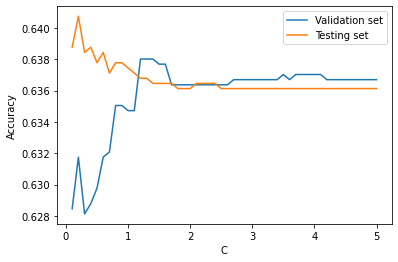

In [502]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score

i = 0.1
change_para = []
accuracies_test = []
accuracies_val = []


while i <= 5:
    model = LogisticRegression(C=i, penalty='l1',solver='liblinear')
    model.fit(df_svalid,y_valid)
    model1 = LogisticRegression(C=i, penalty='l1',solver='liblinear')
    model1.fit(df_stest,y_test)
    change_para.append(i)
    accuracy_val = accuracy_score(y_valid, model.predict(df_svalid))
    accuracies_val.append(accuracy_val)
    accuracy_test = accuracy_score(y_test, model1.predict(df_stest))
    accuracies_test.append(accuracy_test)
    i += 0.1
    
# print(change_para, accuracies)
plt.plot(change_para, accuracies_val, label = 'Validation set')
plt.plot(change_para, accuracies_test, label = 'Testing set')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


    

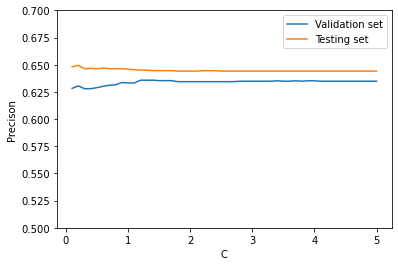

In [503]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score

i = 0.1
change_para = []
precisions_test = []
precisions_val = []


while i <= 5:
    model = LogisticRegression(C=i, penalty='l1',solver='liblinear')
    model.fit(df_svalid,y_valid)
    model1 = LogisticRegression(C=i, penalty='l1',solver='liblinear')
    model1.fit(df_stest,y_test)
    change_para.append(i)
    precision_val = precision_score(y_valid, model.predict(df_svalid))
    precisions_val.append(precision_val)
    precision_test = precision_score(y_test, model1.predict(df_stest))
    precisions_test.append(precision_test)
    i += 0.1
    
# print(change_para, precisions)
plt.plot(change_para, precisions_val, label = 'Validation set')
plt.plot(change_para, precisions_test, label = 'Testing set')
plt.xlabel('C')
plt.ylabel('Precison')
plt.ylim(0.5,0.7)
plt.legend()
plt.show()

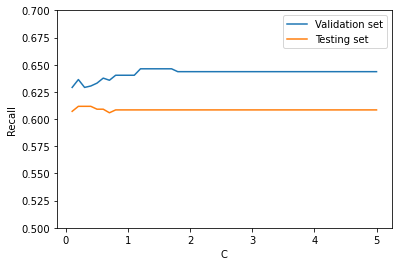

In [504]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score

i = 0.1
change_para = []
recalls_test = []
recalls_val = []


while i <= 5:
    model = LogisticRegression(C=i, penalty='l1',solver='liblinear')
    model.fit(df_svalid,y_valid)
    model1 = LogisticRegression(C=i, penalty='l1',solver='liblinear')
    model1.fit(df_stest,y_test)
    change_para.append(i)
    recall_val = recall_score(y_valid, model.predict(df_svalid))
    recalls_val.append(recall_val)
    recall_test = recall_score(y_test, model1.predict(df_stest))
    recalls_test.append(recall_test)
    i += 0.1
    
# print(change_para, precisions)
plt.plot(change_para, recalls_val, label = 'Validation set')
plt.plot(change_para, recalls_test, label = 'Testing set')
plt.xlabel('C')
plt.ylabel('Recall')
plt.ylim(0.5,0.7)
plt.legend()
plt.show()

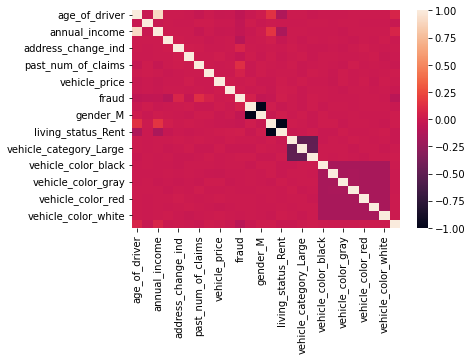

In [430]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr());

In [475]:
# TRAINING SET
model = LogisticRegression(C=0.05, penalty='l2')
model.fit(df_strain,y_train)

modsummary = ModelSummary(model, df_strain,y_train)
modsummary.get_summary()

           coefficient          std  p-value       [0.025       0.975]
intercept        0.005        0.013    0.726       -0.022        0.031
0               -0.321        0.040    0.000       -0.398       -0.243
1               -0.138        0.013    0.000       -0.165       -0.112
2                0.180        0.041    0.000        0.100        0.259
3               -0.266        0.013    0.000       -0.292       -0.240
4                0.205        0.013    0.000        0.179        0.232
5               -0.102        0.013    0.000       -0.128       -0.075
6                0.318        0.014    0.000        0.290        0.346
7                0.145        0.013    0.000        0.119        0.171
8                0.009        0.013    0.514       -0.017        0.035
9                0.025        0.013    0.062       -0.001        0.051
10               0.077  1050062.188    1.000 -2058186.595  2058186.749
11              -0.077  1050062.188    1.000 -2058186.749  2058186.595
12    

In [474]:
# VALIDATION SET
model = LogisticRegression(C=0.050000, penalty='l2')
model.fit(df_svalid,y_valid)

modsummary = ModelSummary(model, df_svalid,y_valid)
modsummary.get_summary()

           coefficient    std  p-value  [0.025  0.975]
intercept       -0.004  0.038    0.926  -0.079   0.072
0               -0.640  0.230    0.006  -1.091  -0.188
1               -0.171  0.039    0.000  -0.248  -0.094
2                0.390  0.230    0.089  -0.060   0.841
3               -0.200  0.039    0.000  -0.276  -0.123
4                0.148  0.039    0.000   0.072   0.225
5               -0.148  0.039    0.000  -0.224  -0.072
6                0.247  0.041    0.000   0.167   0.326
7                0.196  0.039    0.000   0.120   0.272
8               -0.177  0.040    0.000  -0.255  -0.099
9               -0.062  0.039    0.106  -0.138   0.013
10               0.039    NaN      NaN     NaN     NaN
11              -0.039    NaN      NaN     NaN     NaN
12              -0.027    NaN      NaN     NaN     NaN
13               0.027    NaN      NaN     NaN     NaN
14               0.039    NaN      NaN     NaN     NaN
15              -0.082    NaN      NaN     NaN     NaN
16        

In [476]:
# TEST SET
model = LogisticRegression(C=0.05, penalty='l2')
model.fit(df_stest,y_test)

modsummary = ModelSummary(model, df_stest,y_test)
modsummary.get_summary()

           coefficient    std  p-value  [0.025  0.975]
intercept        0.009  0.038    0.808  -0.066   0.085
0               -0.265  0.126    0.035  -0.512  -0.018
1               -0.182  0.039    0.000  -0.258  -0.105
2                0.158  0.129    0.221  -0.095   0.411
3               -0.328  0.039    0.000  -0.404  -0.252
4                0.257  0.039    0.000   0.181   0.334
5               -0.153  0.039    0.000  -0.229  -0.077
6                0.355  0.042    0.000   0.272   0.437
7                0.186  0.039    0.000   0.109   0.262
8                0.048  0.039    0.218  -0.028   0.124
9                0.050  0.039    0.201  -0.027   0.126
10               0.052    NaN      NaN     NaN     NaN
11              -0.052    NaN      NaN     NaN     NaN
12              -0.008    NaN      NaN     NaN     NaN
13               0.008    NaN      NaN     NaN     NaN
14              -0.021    NaN      NaN     NaN     NaN
15              -0.066    NaN      NaN     NaN     NaN
16        